### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eCom = 'data/The E-commerce Dataset.csv'

# Display DataFrame

In [3]:
# your code and solutions
 ## columns = ['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness', 'gender', 'category', 'item_id', 'item_price', 'user_city']
eComm = pd.read_csv(eCom)
display(eComm) ## this prints the DataFrame


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


# Counting Number of Null

In [4]:
# here is before

eComm.isna().sum() ## isna() prints null

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

# Reviewing the 'none' reviewers

In [5]:
NaNreviews= eComm[eComm.review == 'none']
NaNreviews

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
438,71,60900,none,Gladiator,5.0,4.0,M,Movies,30,65.17,13
1222,4461,31903,none,McDonald's,1.0,3.0,M,Restaurants & Gourmet,41,30.74,22
2587,4896,52302,none,Pearl Harbor,2.0,3.0,M,Movies,53,141.75,30
2863,4980,72100,none,MTV,2.0,4.0,F,Media,39,138.00,19
6284,6148,10300,none,AOL (America Online),1.0,4.0,M,Online Stores & Services,0,145.84,32
7569,6560,80300,none,What Lies Beneath,3.0,4.0,F,Movies,85,145.00,14
9230,7123,111799,none,NetZero,5.0,0.0,M,Online Stores & Services,46,53.00,0
9438,7206,21000,none,Blair Witch Project,5.0,0.0,M,Movies,12,44.00,6
11046,7731,62800,none,The Sims 2: Open for Business for Windows,5.0,3.0,M,Games,79,27.00,12
12221,8167,111499,none,Dogma,4.0,4.0,M,Movies,22,87.59,22


In [6]:
NaNreviews.shape

(18, 11)

In [7]:
eComm_nullDrops=eComm.dropna()

# Count removed Null

In [8]:
## Here is After

eComm_nullDrops.isna().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [9]:
print(eComm.shape)

(20000, 11)


In [10]:
print(eComm_nullDrops.shape)


(19934, 11)


In [11]:
eCommReviews = eComm_nullDrops[eComm_nullDrops.review != 'none']
## displayed all reviews that equals to none

eCommReviews

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [12]:
print(eComm.shape, 'this is the Original')
print(eComm_nullDrops.shape, 'dropped all the Null values')
print(eCommReviews.shape, 'dropped all the None Reviews')

(20000, 11) this is the Original
(19934, 11) dropped all the Null values
(19916, 11) dropped all the None Reviews


In [13]:
eComm_clean = eCommReviews
eComm_clean.tail(2)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.0,27
19999,10808,10200,Boldly Displaying Sigourneys Cleavage ..,Galaxy Quest,4.0,0.0,M,Movies,29,67.0,11


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


# Q2. 1) total number of unique users, unique reviews, unique items, and unique categories

In [14]:
# your code and solutions

totalNumOfUniqueUserID = len(eComm_clean.userId.unique())
print(totalNumOfUniqueUserID, '= totalNumOfUniqueUserID')

totalNumOfUniqueReviews = len(eComm_clean.review.unique())
print(totalNumOfUniqueReviews, '= totalNumOfUniqueReviews')

totalNumOfUniqueItems = len(eComm_clean.item.unique())
print(totalNumOfUniqueItems,'=totalNumOfUniqueItems')

totalNumOfUniqueCategories = len(eComm_clean.category.unique())
print(totalNumOfUniqueCategories, '=totalNumOfUniqueCategories')

8562 = totalNumOfUniqueUserID
19459 = totalNumOfUniqueReviews
89 =totalNumOfUniqueItems
9 =totalNumOfUniqueCategories


# 2) descriptive on all rating records

In [15]:
eCommRatings = eComm_clean.rating
len(eCommRatings)

19916

In [16]:
eCommRatings.describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

# male and female

In [17]:
Males = eComm_clean[eComm_clean.gender =='M']
Females = eComm_clean[eComm_clean.gender =='F']

In [18]:
Males.rating.describe()

count    10123.000000
mean         3.686654
std          1.413098
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [19]:
Females.rating.describe()

count    9793.000000
mean        3.717451
std         1.395355
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

# 4) each items

In [20]:
x = [totalNumOfUniqueItems]
#print( eComm_clean.item.unique())

for items in eComm_clean.item.unique():
    print("\n\n Description for: " + items)
    print(eComm_clean[eComm_clean.item == items].rating.describe())



 Description for: eBay
count    596.000000
mean       4.333893
std        0.949618
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: NetZero
count    350.000000
mean       3.074286
std        1.360588
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: AOL (America Online)
count    939.000000
mean       2.500532
std        1.368528
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Blair Witch Project
count    339.000000
mean       2.548673
std        1.455399
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Matrix
count    346.000000
mean       4.653179
std        0.723080
min        1.000000
25%

count    242.000000
mean       4.318182
std        1.031657
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: J. K. Rowling - Harry Potter and the Sorcerer's Stone
count    206.000000
mean       4.718447
std        0.638863
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: StartSampling.Com
count    220.000000
mean       2.727273
std        1.267141
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Roller Coaster Tycoon For Windows
count    152.000000
mean       4.578947
std        0.750508
min        2.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


In [21]:
#print( eComm_clean.item.unique())

for items in eComm_clean.item.unique():
    print("\n\n Description for: " + items)
    print(eComm_clean[eComm_clean.item == items].rating.describe())



 Description for: eBay
count    596.000000
mean       4.333893
std        0.949618
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: NetZero
count    350.000000
mean       3.074286
std        1.360588
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: AOL (America Online)
count    939.000000
mean       2.500532
std        1.368528
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Blair Witch Project
count    339.000000
mean       2.548673
std        1.455399
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Matrix
count    346.000000
mean       4.653179
std        0.723080
min        1.000000
25%

count    174.000000
mean       4.683908
std        0.606396
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: What Lies Beneath
count    160.000000
mean       3.450000
std        1.201676
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Diablo 2 - Bestseller Series for Windows
count    167.000000
mean       4.377246
std        0.868573
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Star Wars Episode I: The Phantom Menace
count    166.000000
mean       3.481928
std        1.253953
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


 Description for: Crouching Tiger, Hidden Dragon
count    148.000000
mean       4.3

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

# Compare the mean

### mean would show the Average rating... sample size difference may affect the mean comparison ? a single sample would have less effects 

# Gender vs Rating mean

In [22]:
Males.rating.shape

print("Female Ratings:  ", Females.rating.shape[0])
print("Unique Female Users based on ID in Sample: ", len(Females.userId.unique()))
print("Average number of reviews per User: ", Females.rating.shape[0] / len(Females.userId.unique()))
print()

print("Male Ratings:  ", Males.rating.shape[0])
print("Unique Male Users based on ID in Sample: ", len(Males.userId.unique()))
print("Average number of reviews per User: ", Males.rating.shape[0] / len(Males.userId.unique()))
print()
print("test for total does total unique accounts add up: ",len(Males.userId.unique()) + len(Females.userId.unique()) == len(eComm_clean.userId.unique()))


Female Ratings:   9793
Unique Female Users based on ID in Sample:  4233
Average number of reviews per User:  2.3134892511221357

Male Ratings:   10123
Unique Male Users based on ID in Sample:  4329
Average number of reviews per User:  2.3384153384153383

test for total does total unique accounts add up:  True


Males tends to post more than females on average, 96 more unique Males Users resulting in 330 more Ratings



In [23]:
GenderVrating = eComm_clean.groupby('gender', as_index = False)['rating'].mean()

GenderVrating

,gender,rating
0,F,3.717451
1,M,3.686654


Female has higher $\bar{x}$ mean ratings compared to Male

In [24]:
## Gender two-sample T-test 

In [25]:
import scipy.stats as stats


stats.ttest_ind(a=Males.rating, b=Females.rating, equal_var=True)


Ttest_indResult(statistic=-1.5471405296881968, pvalue=0.12184525323579175)

p>0.05 , fail to reject the $H_{0}$ null hypothesis(no relationship between male and female), the population means are likely equal

# graph

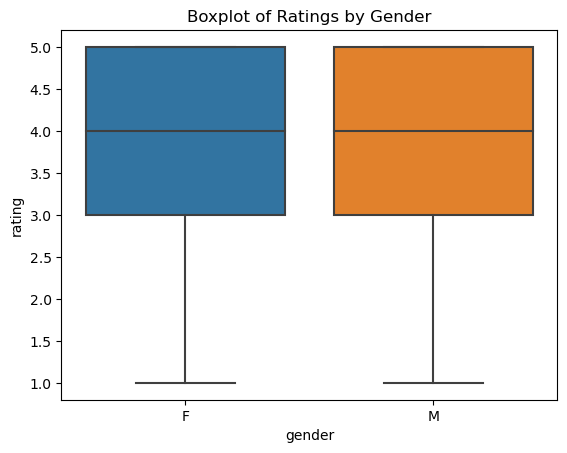

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="gender", y="rating", data=eComm_clean)
plt.title("Boxplot of Ratings by Gender")
plt.show()

C:\Users\mingy\AppData\Local\Temp\ipykernel_8980\4250398178.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['rating'], hist=True, kde=False,


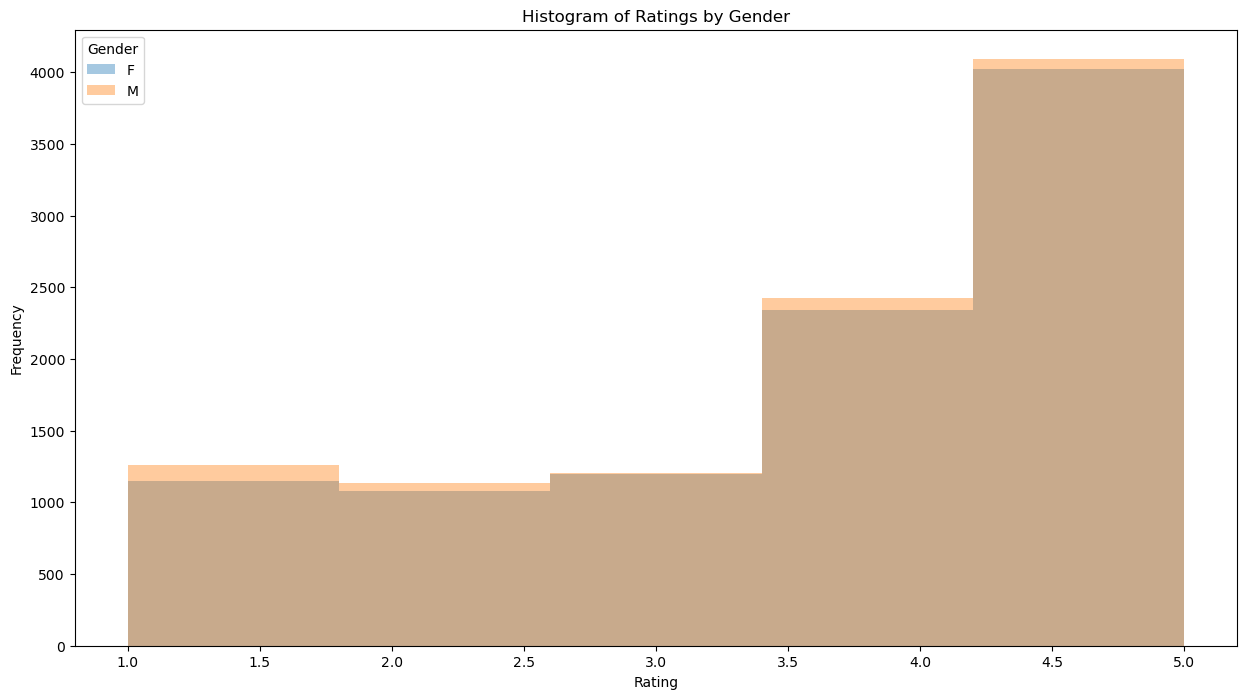

In [31]:
# Histogram for Ratings by Gender
genders = eComm_clean['gender'].unique()
plt.figure(figsize=(15,8))

for gender in genders:
    subset = eComm_clean[eComm_clean['gender'] == gender]
    sns.distplot(subset['rating'], hist=True, kde=False, 
                 bins=5, label=gender)

plt.legend(prop={'size': 10}, title = 'Gender')
plt.title('Histogram of Ratings by Gender')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



## *Summary 1* 

From the rating to mean value comparison, Female has higher mean and a lower spread. Despite the sample size difference t-test shows its insignificant (p>0.5) making them fairly equal, the average also shows that males shares more reviews on average (2.33... vs 2.31...)

Males users posts more with more range but with lower mean ratings suggesting that males tends to provide more lower ratings than females. 

In [31]:
# your code and solutions

# Category vs Rating mean

## item and mean rating sorted in descending Order to find the highest mean_ratings in a category

In [204]:
CategoryVrating = eComm_clean.groupby('category', as_index = False)['rating'].mean()
CategoryVrating.sort_values(['rating'],ascending=[False])

,category,rating
0,Books,4.718447
1,Games,4.421569
5,Movies,3.902242
3,Kids & Family,3.689655
2,Hotels & Travel,3.560940
8,Restaurants & Gourmet,3.506463
7,Personal Finance,3.477146
6,Online Stores & Services,3.444318
4,Media,2.724409


#  Boxplot for Category vs Rating

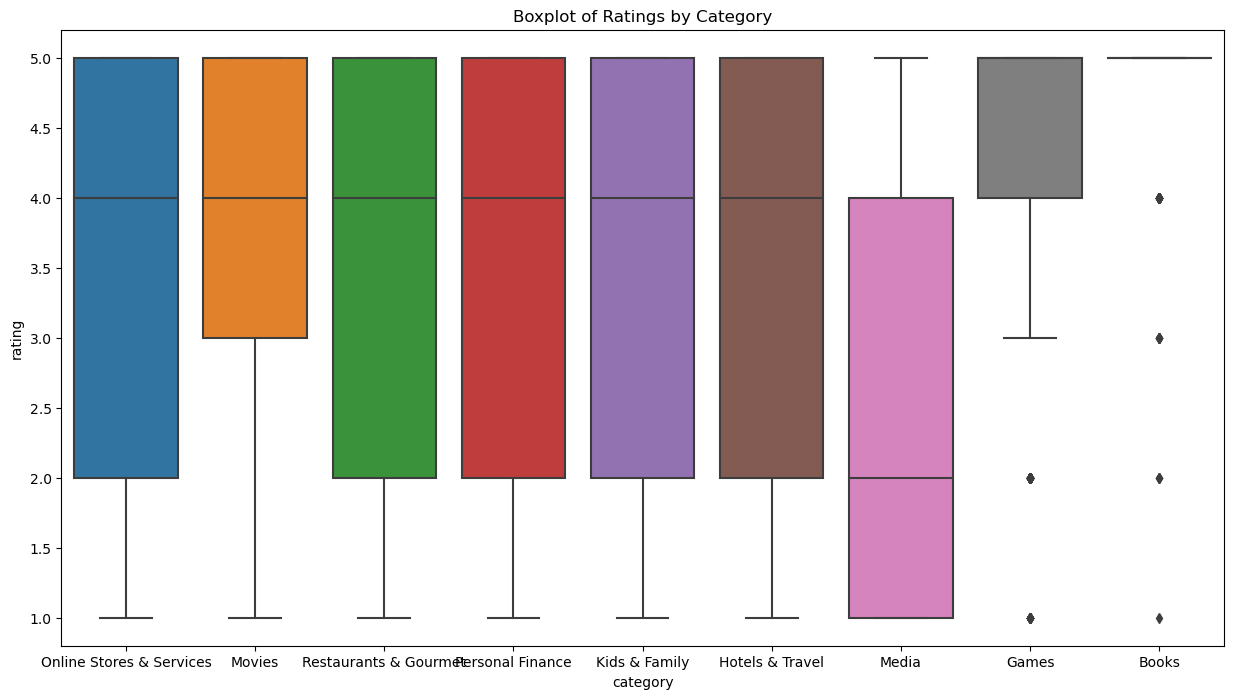

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x="category", y="rating", data=eComm_clean)
plt.title("Boxplot of Ratings by Category")
plt.show()


# Histogram for Ratings by Helpfulness

C:\Users\mingy\AppData\Local\Temp\ipykernel_8980\3531678257.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['rating'], hist=True, kde=False,


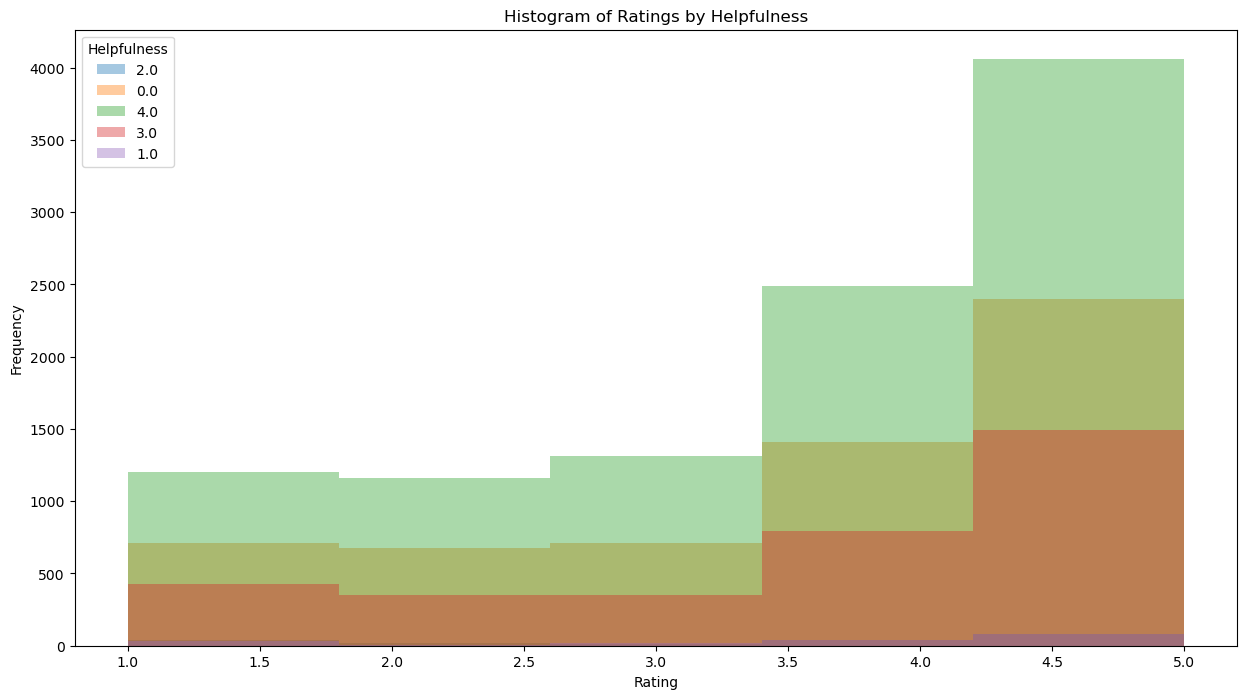

In [34]:

helpfulness_values = eComm_clean['helpfulness'].unique()
plt.figure(figsize=(15,8))
for helpfulness in helpfulness_values:
    subset = eComm_clean[eComm_clean['helpfulness'] == helpfulness]
    sns.distplot(subset['rating'], hist=True, kde=False, 
                 bins=5, label=str(helpfulness))
plt.legend(prop={'size': 10}, title = 'Helpfulness')
plt.title('Histogram of Ratings by Helpfulness')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Helpfulness vs Rating mean

In [156]:
HelpfulnessVrating = eComm_clean.groupby('helpfulness', as_index = False)['rating'].mean()
HelpfulnessVrating.sort_values(['rating'],ascending=[False])

,helpfulness,rating
1,1.0,3.772727
3,3.0,3.752996
0,0.0,3.695939
4,4.0,3.689689
2,2.0,3.545455


## Boxplot for Helpfulness vs Rating

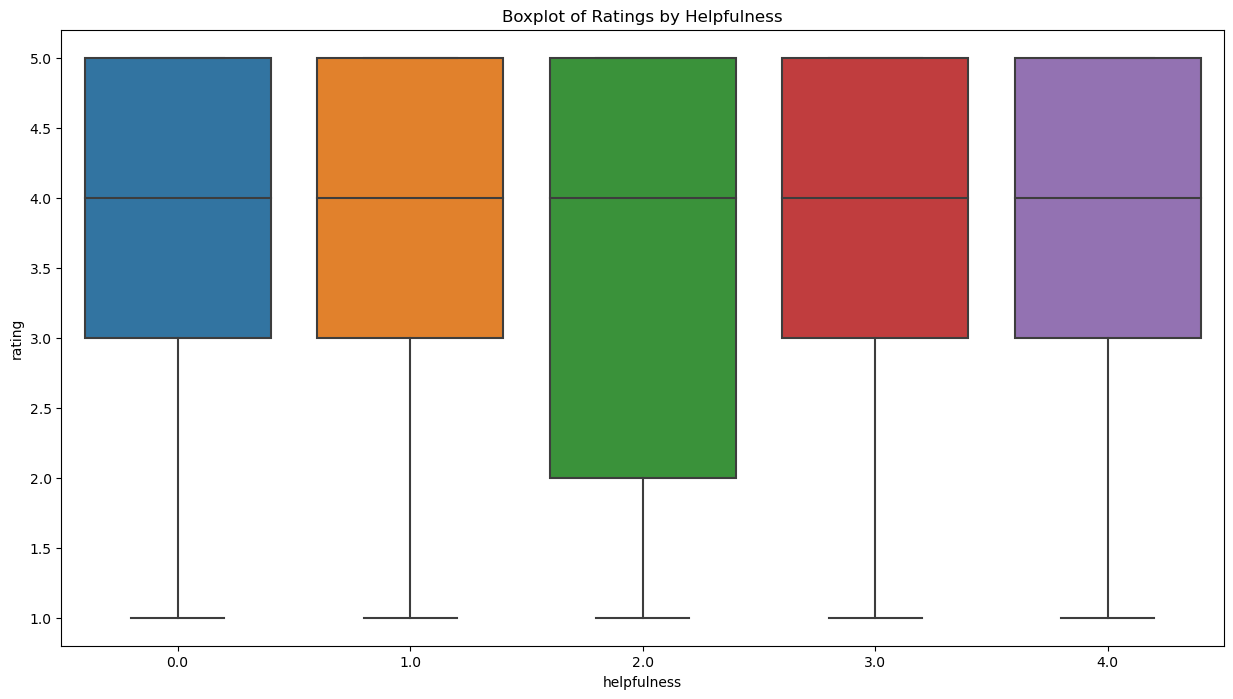

In [29]:

plt.figure(figsize=(15,8))
sns.boxplot(x="helpfulness", y="rating", data=eComm_clean)
plt.title("Boxplot of Ratings by Helpfulness")
plt.show()


## Histogram for Ratings by Helpfulness

C:\Users\mingy\AppData\Local\Temp\ipykernel_8980\2908662467.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['rating'], hist=True, kde=False,


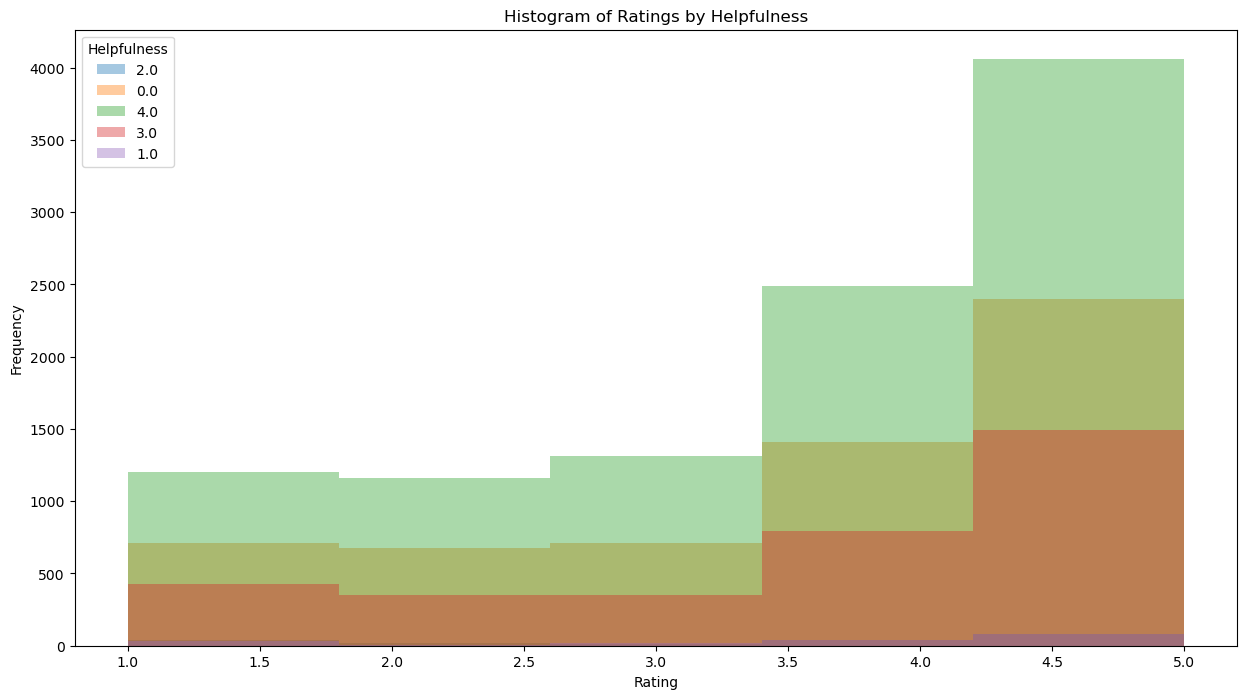

In [30]:

helpfulness_values = eComm_clean['helpfulness'].unique()
plt.figure(figsize=(15,8))
for helpfulness in helpfulness_values:
    subset = eComm_clean[eComm_clean['helpfulness'] == helpfulness]
    sns.distplot(subset['rating'], hist=True, kde=False, 
                 bins=5, label=str(helpfulness))
plt.legend(prop={'size': 10}, title = 'Helpfulness')
plt.title('Histogram of Ratings by Helpfulness')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

# Initital dataset

In [60]:
initial_length = len(eComm_clean)

initial_length

2685

## review of which helpfulness is no more than 2

In [61]:
eComm_cleanHelpRemoved = eComm_clean[eComm_clean['helpfulness'] > 2]

In [62]:
len(eComm_cleanHelpRemoved)

2685

## users who rate less than 7 items

In [63]:
user_counts = eComm_cleanHelpRemoved['userId'].value_counts()
users_to_remove = user_counts[user_counts < 7].index
eComm_cleanHelpRemoved.drop(eComm_cleanHelpRemoved[eComm_cleanHelpRemoved['userId'].isin(users_to_remove)].index, inplace=True)

In [64]:
item_counts = eComm_cleanHelpRemoved['item_id'].value_counts()
items_to_remove = item_counts[item_counts < 11].index
eComm_cleanHelpRemoved.drop(eComm_cleanHelpRemoved[eComm_cleanHelpRemoved['item_id'].isin(items_to_remove)].index, inplace=True)


In [65]:
print("Initial length of data: ") 
print(initial_length)
print("Length of data after removing outliers: ")
print(len(eComm_cleanHelpRemoved))

Initial length of data: 
2685
Length of data after removing outliers: 
2571
